In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import chardet

In [3]:
with open('customer_booking.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")

Detected encoding: ISO-8859-1


In [4]:
customer_booking_data= pd.read_csv('customer_booking.csv',encoding=encoding)
customer_booking_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
customer_booking_data.shape

(50000, 14)

In [6]:
customer_booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
customer_booking_data=customer_booking_data.applymap(lambda x:x.strip() if isinstance(x,str) else x)

There are no missing values in the data

In [8]:
categorical_columns=list((customer_booking_data.select_dtypes(include=['object'])).columns)
categorical_columns

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

In [9]:
numerical_columns=list((customer_booking_data.select_dtypes(include=['int64','float64'])).columns)
numerical_columns

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']

In [11]:
for i in categorical_columns:
    print(customer_booking_data[i].value_counts())
    print('\n')

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64


RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64


Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64


AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
JEDPDG       1
HDYHGH       1
KOSSYD       1
CCUMRU       1
OOLWUH       1
Name: route, Length: 799, dtype: int64


Australia           17872
Malaysia             7174
South Korea          4559
Japan                3885
China                3387
                    ...  
Papua New Guinea        1
Guatemala               1
Malta                   1
Lebanon                 1
Tonga                   1
Name: booking_origin, Length: 104, dtype: int64




In [13]:
customer_booking_data=pd.get_dummies(customer_booking_data,columns=['trip_type','sales_channel'],drop_first=True)
customer_booking_data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_OneWay,trip_type_RoundTrip,sales_channel_Mobile
0,2,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0,1,0
1,1,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0,1,0
2,2,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0,1,0
3,1,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0,1,0
4,2,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,0,1,0


In [14]:
flight_day_dict={'Sun':0,
                 'Mon':1,
                 'Tue':2,
                 'Wed':3,
                 'Thu':4,
                 'Fri':5,
                 'Sat':6
                }

In [16]:
customer_booking_data['flight_day']= customer_booking_data['flight_day'].map(flight_day_dict)

In [17]:
customer_booking_data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_OneWay,trip_type_RoundTrip,sales_channel_Mobile
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,1,0
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,1,0
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,1,0
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,1,0
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,1,0


In [20]:
round(customer_booking_data.groupby('route')['booking_complete'].mean(),2).to_dict()

{'AKLDEL': 0.0,
 'AKLHGH': 0.0,
 'AKLHND': 0.0,
 'AKLICN': 0.0,
 'AKLKIX': 0.0,
 'AKLKTM': 0.0,
 'AKLKUL': 0.21,
 'AKLMRU': 0.0,
 'AKLPEK': 0.8,
 'AKLPVG': 0.33,
 'AKLTPE': 0.0,
 'AORICN': 0.39,
 'AORKIX': 0.33,
 'AORKTM': 0.12,
 'AORMEL': 0.23,
 'AORPER': 1.0,
 'AORPUS': 1.0,
 'BBIMEL': 0.0,
 'BBIOOL': 0.0,
 'BBIPER': 0.0,
 'BBISYD': 0.18,
 'BDOCTS': 0.0,
 'BDOCTU': 0.0,
 'BDOHGH': 0.09,
 'BDOICN': 0.29,
 'BDOIKA': 0.0,
 'BDOKIX': 0.25,
 'BDOMEL': 0.28,
 'BDOOOL': 0.2,
 'BDOPEK': 0.08,
 'BDOPER': 0.2,
 'BDOPUS': 0.08,
 'BDOPVG': 0.67,
 'BDOSYD': 0.16,
 'BDOTPE': 0.2,
 'BDOWUH': 0.0,
 'BDOXIY': 0.0,
 'BKICKG': 0.0,
 'BKICTS': 0.12,
 'BKICTU': 0.36,
 'BKIDEL': 0.25,
 'BKIHND': 0.24,
 'BKIICN': 0.41,
 'BKIKIX': 0.35,
 'BKIKTM': 0.83,
 'BKIMEL': 0.32,
 'BKIMRU': 0.0,
 'BKIOOL': 0.17,
 'BKIPEK': 0.22,
 'BKIPER': 0.21,
 'BKIPUS': 0.4,
 'BKIPVG': 0.18,
 'BKISYD': 0.23,
 'BKIXIY': 0.28,
 'BLRICN': 0.0,
 'BLRMEL': 0.16,
 'BLRPER': 0.1,
 'BLRSYD': 0.09,
 'BOMMEL': 0.0,
 'BOMOOL': 0.0,
 'BOMPER'

In [21]:
route_dict=customer_booking_data['route'].value_counts().to_dict()
route_dict

{'AKLKUL': 2680,
 'PENTPE': 924,
 'MELSGN': 842,
 'ICNSIN': 801,
 'DMKKIX': 744,
 'ICNSYD': 695,
 'DMKPER': 679,
 'DPSICN': 666,
 'DMKOOL': 655,
 'MELPEN': 649,
 'MELTPE': 644,
 'SGNSYD': 614,
 'DMKSYD': 532,
 'COKSYD': 511,
 'COKMEL': 474,
 'CMBMEL': 465,
 'HNDPEN': 442,
 'PENPER': 437,
 'DPSPVG': 417,
 'CGKICN': 414,
 'JHBKTM': 409,
 'CGKHND': 389,
 'HKTICN': 375,
 'PENSYD': 369,
 'PERSGN': 361,
 'DMKMEL': 351,
 'CTSDMK': 350,
 'HKTSYD': 346,
 'DPSKIX': 342,
 'COKPER': 338,
 'CGKKIX': 338,
 'ICNPER': 335,
 'HKTPER': 327,
 'CMBSYD': 317,
 'KTMPEN': 314,
 'DPSHND': 313,
 'PERTPE': 312,
 'ICNPEN': 299,
 'ICNMEL': 298,
 'OOLSGN': 296,
 'HNDSIN': 288,
 'KTMMFM': 275,
 'HKTOOL': 273,
 'DMKICN': 272,
 'DELMEL': 268,
 'HYDSYD': 265,
 'KIXSIN': 261,
 'HNDPER': 261,
 'DPSPEK': 254,
 'KCHPER': 254,
 'PENPVG': 242,
 'MELMNL': 235,
 'HKTKIX': 232,
 'HKTMEL': 230,
 'KCHMEL': 228,
 'DPSPUS': 227,
 'PERPNH': 221,
 'KIXPEN': 218,
 'BKIICN': 214,
 'ICNOOL': 210,
 'DELSYD': 210,
 'KNOTPE': 208,
 'SYDTP

In [22]:
customer_booking_data['route']= customer_booking_data['route'].map(route_dict)

In [23]:
booking_origin_dict=customer_booking_data['booking_origin'].value_counts().to_dict()
booking_origin_dict

{'Australia': 17872,
 'Malaysia': 7174,
 'South Korea': 4559,
 'Japan': 3885,
 'China': 3387,
 'Indonesia': 2369,
 'Taiwan': 2077,
 'Thailand': 2030,
 'India': 1270,
 'New Zealand': 1074,
 'Singapore': 1044,
 'United States': 456,
 'Vietnam': 388,
 'Macau': 304,
 'Hong Kong': 295,
 'Philippines': 266,
 'United Kingdom': 173,
 'Brunei': 167,
 'Cambodia': 132,
 '(not set)': 84,
 'Sri Lanka': 73,
 'France': 59,
 'Italy': 58,
 'Canada': 57,
 'Germany': 57,
 'Myanmar (Burma)': 51,
 'Netherlands': 46,
 'Mauritius': 44,
 'United Arab Emirates': 42,
 'Nepal': 40,
 'Saudi Arabia': 36,
 'Bangladesh': 36,
 'Russia': 32,
 'Spain': 27,
 'Laos': 25,
 'Switzerland': 18,
 'Chile': 17,
 'Qatar': 15,
 'Iran': 14,
 'Sweden': 12,
 'Réunion': 12,
 'Turkey': 9,
 'Kuwait': 9,
 'Brazil': 9,
 'Oman': 9,
 'Mexico': 9,
 'Ireland': 9,
 'Poland': 8,
 'Finland': 8,
 'Maldives': 8,
 'Mongolia': 8,
 'Czech Republic': 8,
 'Austria': 8,
 'Belgium': 7,
 'Denmark': 7,
 'Greece': 7,
 'Argentina': 6,
 'Portugal': 6,
 'New 

In [24]:
booking_origin_dict

{'Australia': 17872,
 'Malaysia': 7174,
 'South Korea': 4559,
 'Japan': 3885,
 'China': 3387,
 'Indonesia': 2369,
 'Taiwan': 2077,
 'Thailand': 2030,
 'India': 1270,
 'New Zealand': 1074,
 'Singapore': 1044,
 'United States': 456,
 'Vietnam': 388,
 'Macau': 304,
 'Hong Kong': 295,
 'Philippines': 266,
 'United Kingdom': 173,
 'Brunei': 167,
 'Cambodia': 132,
 '(not set)': 84,
 'Sri Lanka': 73,
 'France': 59,
 'Italy': 58,
 'Canada': 57,
 'Germany': 57,
 'Myanmar (Burma)': 51,
 'Netherlands': 46,
 'Mauritius': 44,
 'United Arab Emirates': 42,
 'Nepal': 40,
 'Saudi Arabia': 36,
 'Bangladesh': 36,
 'Russia': 32,
 'Spain': 27,
 'Laos': 25,
 'Switzerland': 18,
 'Chile': 17,
 'Qatar': 15,
 'Iran': 14,
 'Sweden': 12,
 'Réunion': 12,
 'Turkey': 9,
 'Kuwait': 9,
 'Brazil': 9,
 'Oman': 9,
 'Mexico': 9,
 'Ireland': 9,
 'Poland': 8,
 'Finland': 8,
 'Maldives': 8,
 'Mongolia': 8,
 'Czech Republic': 8,
 'Austria': 8,
 'Belgium': 7,
 'Denmark': 7,
 'Greece': 7,
 'Argentina': 6,
 'Portugal': 6,
 'New 

In [25]:
customer_booking_data['booking_origin']= customer_booking_data['booking_origin'].map(booking_origin_dict)

In [26]:
customer_booking_data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_OneWay,trip_type_RoundTrip,sales_channel_Mobile
0,2,262,19,7,6,20,1074,1,0,0,5.52,0,0,1,0
1,1,112,20,3,6,20,1074,0,0,0,5.52,0,0,1,0
2,2,243,22,17,3,20,1270,1,1,0,5.52,0,0,1,0
3,1,96,31,4,6,20,1074,0,0,1,5.52,0,0,1,0
4,2,68,22,15,3,20,1270,1,0,1,5.52,0,0,1,0


In [27]:
customer_booking_data['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

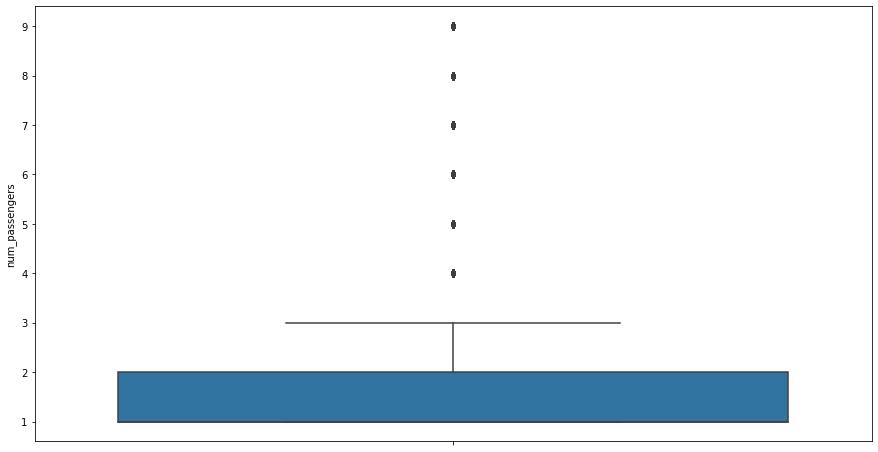

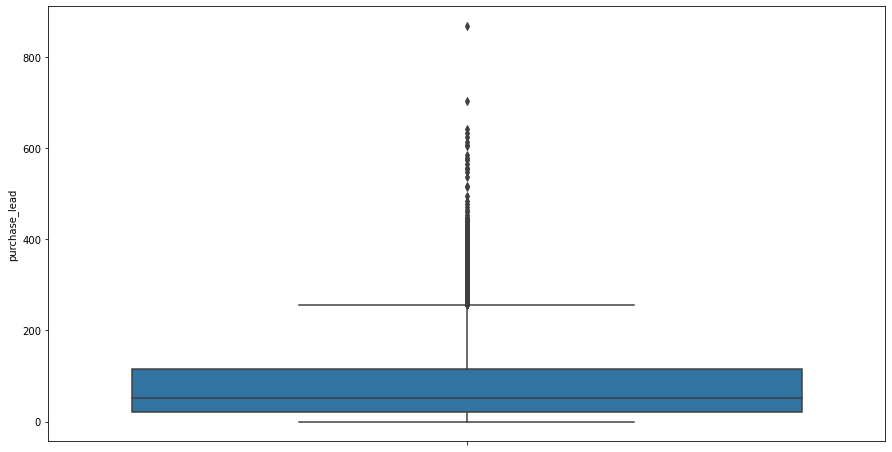

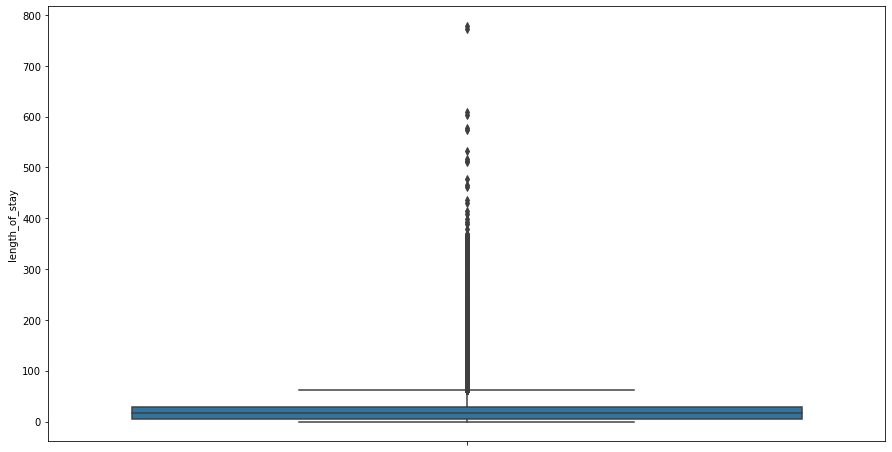

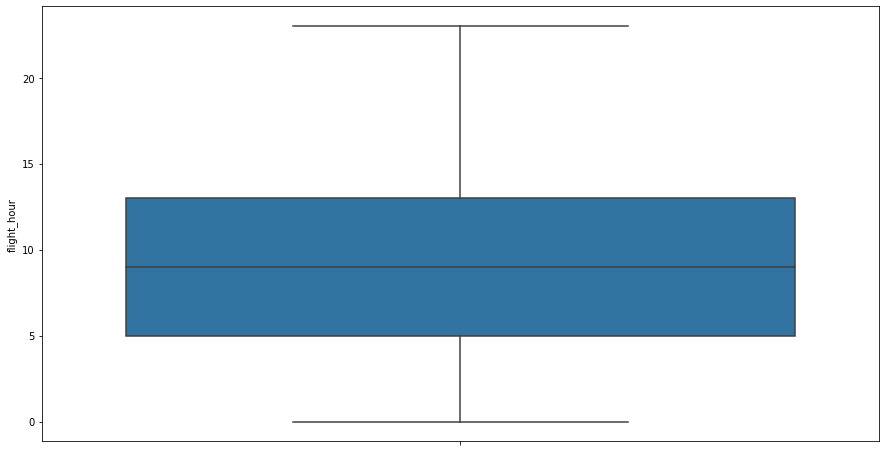

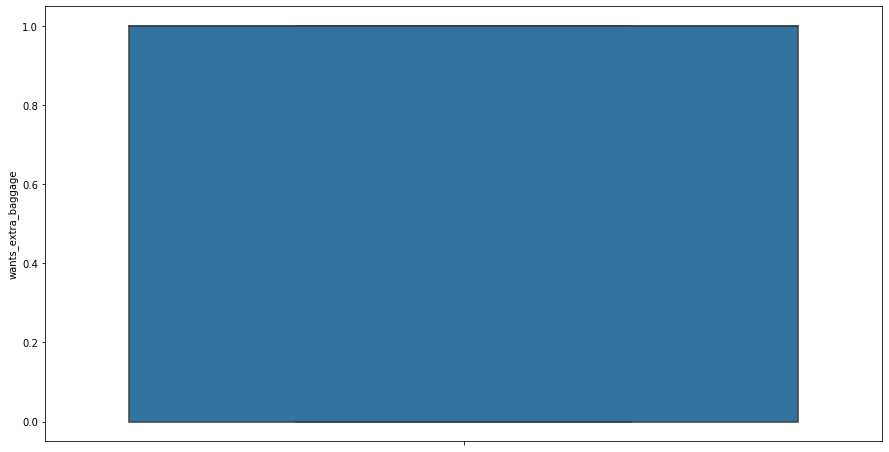

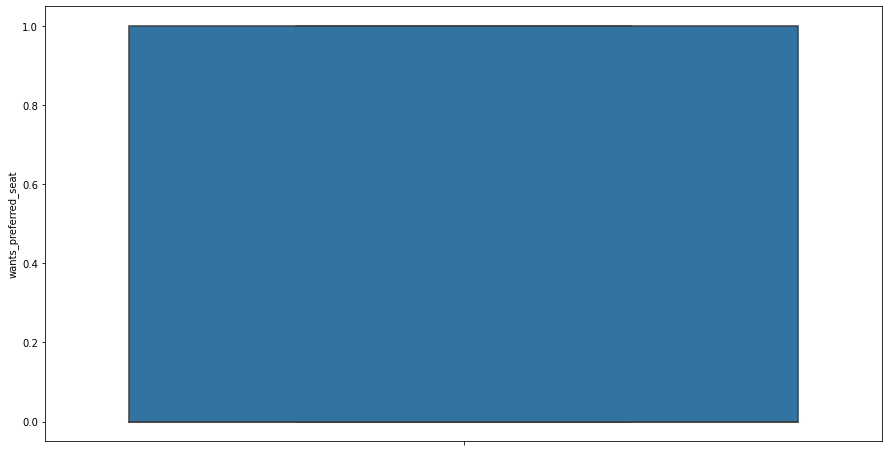

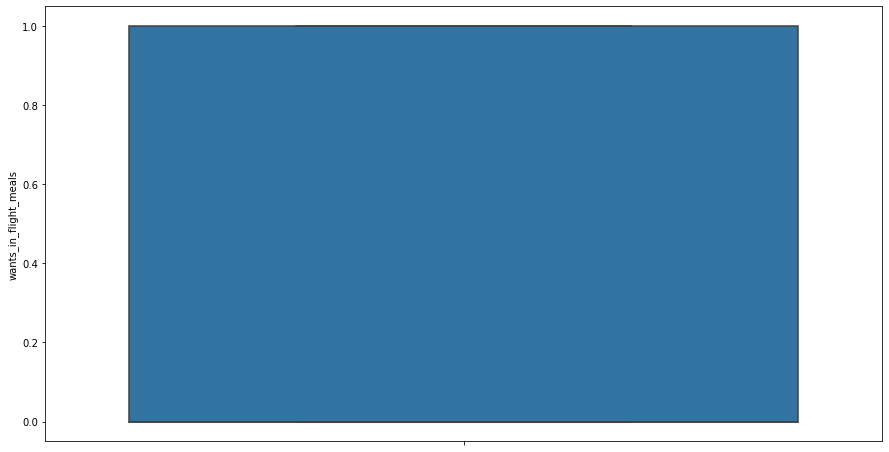

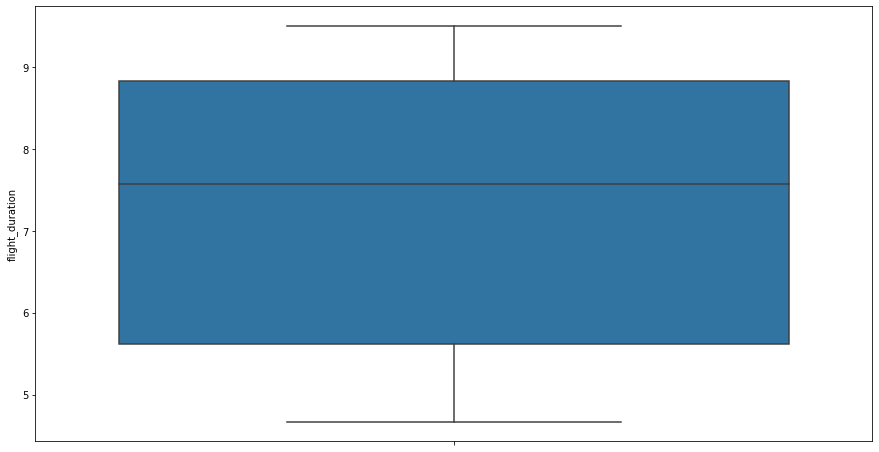

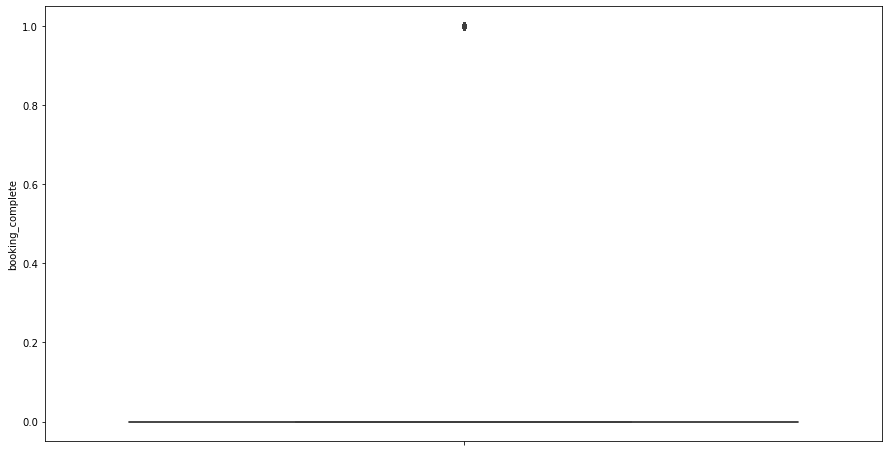

In [50]:
for i in numerical_columns:
    plt.figure(figsize=(15,8))
    sns.boxplot(y=i,data=customer_booking_data)

There are outliers in the data, but not handlinng currently

In [32]:
X_features=list(customer_booking_data.columns)
X_features.remove('booking_complete')

In [33]:
X=customer_booking_data[X_features]
Y=customer_booking_data['booking_complete']

In [34]:
from sklearn.feature_selection import SelectKBest,chi2

In [36]:
best_features=SelectKBest(score_func=chi2,k=5)
best_features.fit(X,Y)

SelectKBest(k=5, score_func=<function chi2 at 0x000001D44C9AF160>)

In [40]:
features=pd.DataFrame({'columns':X.columns,'scores':best_features.scores_})
features.sort_values("scores",ascending=False)

,columns,scores
6,booking_origin,8.431898e+06
5,route,5.968522e+04
2,length_of_stay,4.480965e+03
1,purchase_lead,2.358678e+03
10,flight_duration,1.738317e+02
8,wants_preferred_seat,8.828809e+01
7,wants_extra_baggage,7.689035e+01
13,sales_channel_Mobile,7.482389e+01
11,trip_type_OneWay,2.915033e+01
9,wants_in_flight_meals,2.013096e+01


<AxesSubplot:>

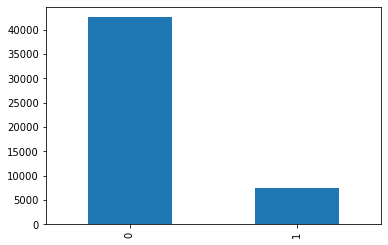

In [41]:
customer_booking_data['booking_complete'].value_counts().plot(kind='bar')

The dataset is imbalanced, let us balance the dataset.

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=3008)

In [46]:
X_bal,Y_bal=smote.fit_resample(X,Y)

In [47]:
Y_bal.value_counts()

0    42522
1    42522
Name: booking_complete, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
train_X, test_X,train_Y, test_Y= train_test_split(X_bal,Y_bal,train_size=0.8,random_state=3008)

In [58]:
from sklearn.tree import DecisionTreeClassifier


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [60]:
train_Y.head()

4829     0
66585    1
35394    0
18031    0
47019    0
Name: booking_complete, dtype: int64

DECISION TREE CLASSIFIER

In [62]:
dec_tree=DecisionTreeClassifier(criterion='gini', min_samples_split=5,max_depth=3)
dec_tree.fit(train_X,train_Y)

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [63]:
dc_preds= dec_tree.predict(test_X)
dc_preds

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [65]:
#Accuracy on test data
accuracy_score(test_Y,dc_preds)

0.6735845728731847

In [67]:
#Accuracy on train data
accuracy_score(train_Y,dec_tree.predict(train_X))

0.6689792018813846

In [68]:
print(classification_report(test_Y,dc_preds))

              precision    recall  f1-score   support

           0       0.78      0.48      0.59      8452
           1       0.63      0.86      0.73      8557

    accuracy                           0.67     17009
   macro avg       0.70      0.67      0.66     17009
weighted avg       0.70      0.67      0.66     17009



Random Forest Classifier

In [69]:
rfc=RandomForestClassifier(criterion='gini',max_depth=5, min_samples_split=10)
rfc.fit(train_X, train_Y)

RandomForestClassifier(max_depth=5, min_samples_split=10)

In [70]:
rf_preds=rfc.predict(test_X)

In [78]:
#accuracy on test data
accuracy_score(test_Y,rf_preds)

0.7143865012640367

In [79]:
#accuracy on train data
accuracy_score(train_Y,rfc.predict(train_X))

0.7104872492099654

In [73]:
print(classification_report(test_Y,rf_preds))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68      8452
           1       0.68      0.80      0.74      8557

    accuracy                           0.71     17009
   macro avg       0.72      0.71      0.71     17009
weighted avg       0.72      0.71      0.71     17009



Logistic Regression

In [76]:
logist=LogisticRegression(max_iter=1000000)
logist.fit(train_X,train_Y)

LogisticRegression(max_iter=1000000)

In [77]:
lg_predicts=logist.predict(test_X)

In [80]:
#accuracy on test data
accuracy_score(test_Y,lg_predicts)

0.6472455758715974

In [81]:
#accuracy on train data
accuracy_score(train_Y,logist.predict(train_X))

0.6475784522672154

In [82]:
print(classification_report(test_Y,lg_predicts))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      8452
           1       0.64      0.67      0.66      8557

    accuracy                           0.65     17009
   macro avg       0.65      0.65      0.65     17009
weighted avg       0.65      0.65      0.65     17009



K nearest neighbors

In [83]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_Y)

KNeighborsClassifier()

In [84]:
knn_predicts= knn.predict(test_X)

In [85]:
#accuracy on test data
accuracy_score(test_Y, knn_predicts)

0.811629137515433

In [86]:
#accuracy on train data
accuracy_score(train_Y, knn.predict(train_X))

0.8679209230543102

In [87]:
print(classification_report(test_Y, knn_predicts))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      8452
           1       0.75      0.93      0.83      8557

    accuracy                           0.81     17009
   macro avg       0.83      0.81      0.81     17009
weighted avg       0.83      0.81      0.81     17009



Feature Importances

In [91]:
rfc.feature_importances_

array([1.41432237e-02, 8.69589934e-03, 1.18018916e-01, 1.65440733e-02,
       7.55089527e-02, 4.17432739e-02, 4.00866937e-01, 4.20329916e-04,
       2.21643046e-02, 5.21912928e-02, 1.29072970e-01, 2.13749016e-03,
       3.74969182e-04, 1.18117366e-01])

Text(0.5, 1.0, 'importance of each feature')

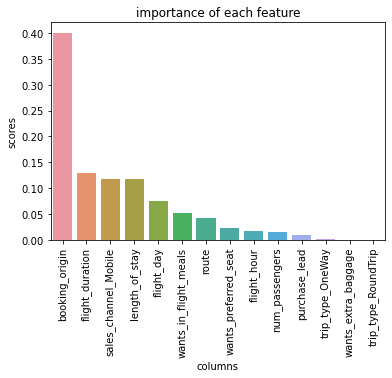

In [104]:
features=pd.DataFrame({'columns':X.columns,'scores':rfc.feature_importances_})
features.sort_values('scores',ascending=False)
sns.barplot(x='columns',y="scores",data=features,order=(features.sort_values('scores',ascending=False))['columns'])
plt.xticks(rotation=90)
plt.title('importance of each feature')

In [105]:
from sklearn.model_selection import GridSearchCV
tuned_params={'criterion':['gini','entropy'],'min_samples_split': range(2,10), 'max_depth': range(2,10)}
gcv= GridSearchCV(RandomForestClassifier(),tuned_params,cv=5,scoring='roc_auc')
gcv.fit(train_X, train_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_split': range(2, 10)},
             scoring='roc_auc')